> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [No_show_appoinments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is
focused on the question of whether or not patients show upfor their appointment. 

A number of characteristics about the patient are included in each row.

● ‘ScheduledDay’ tells us on what day the patient set up their appointment.

● ‘Neighborhood’ indicates the location of the hospital.

● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian
welfare program Bolsa Familia.

● Be careful about the encoding of the last column: it says ‘No’ if the patient 
showed up to their appointment, and ‘Yes’ if they did not show up.



### Question(s) for Analysis
We will try to understand how these factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

from load_data_investigate import load_data
num = 1
string = ""
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#exploring the shape of data.
df.shape

(110527, 14)

Data consists of 110527 (row) and 14 (column)

In [5]:
#check is there any dupications
df.duplicated().sum()

0

There is no indentical duplications of the rows in our dataset.

In [6]:
#check the number of unique values
df['PatientId'].nunique()

62299

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There is no missing values.

In [9]:
#getting some important information about our data.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The mean age is 37, max age is 115, min age is -1 which means that there is a misatake(I am gonna remove it in cleanning step).

In [10]:
mask=df.query('Age=="-1"')
mask

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


the row index which has a wrong value 'age = -1' is "99832"

In [11]:
# After discussing the structure of the data and any problems that need to bef
#   cleaned, perform those cleaning steps in the second part of this section.


# Data Cleaning

In [12]:
#removing the -1 value of minimun age.
df.drop(index=99832, inplace = True)

In [13]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [14]:
#correction of columns names.
df.rename(columns = {'Hipertension':'Hypertension'}, inplace = True)
df.rename(columns = {'No-show':'No_show'}, inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
#removing_duplicated IDs with duplicated status, Leaving the duplicated IDs if they differ in the 
#showing status as the same patient may have several appointments, attend some and obsert form others
df.drop_duplicates(['PatientId','No_show'], inplace = True)
df.shape

(71816, 14)

In [16]:
#removing unnecessary data
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1 ,inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

Now that we've trimmed and cleaned our data, we're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section.





### General look

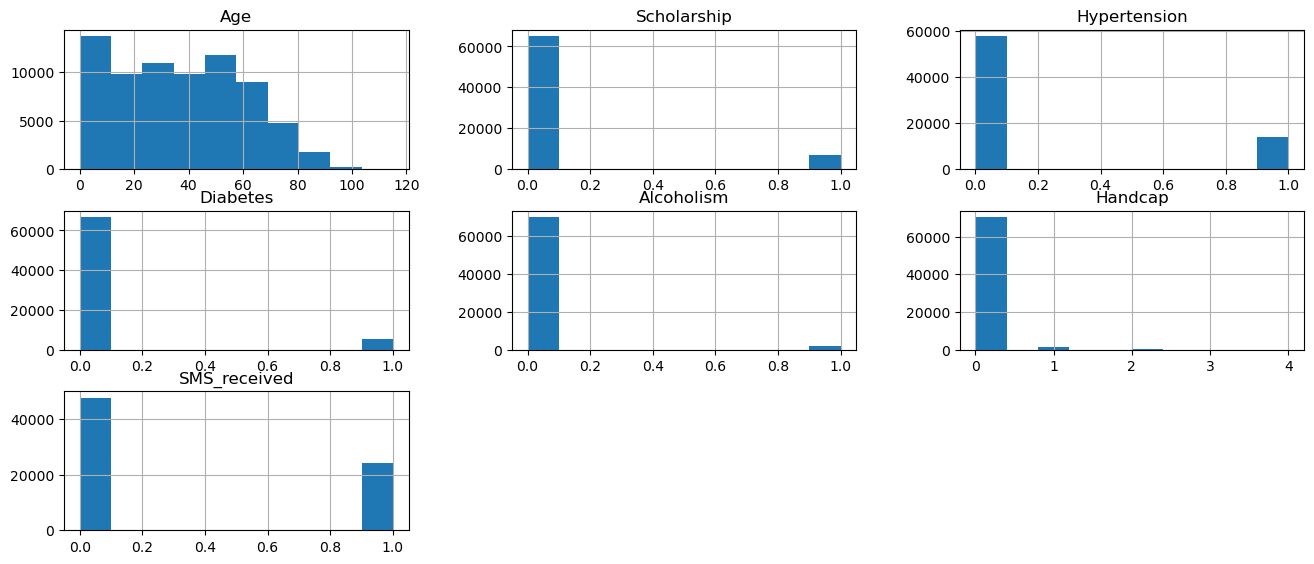

In [17]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize=(16,6.5));

In [18]:
# Dividing the patients to 2 groups according to showing or not, then exploring them.
show = df.No_show=='No'
noshow = df.No_show=='Yes'
df[show].count(),df[noshow].count()

(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hypertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No_show          54153
 dtype: int64,
 Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_show          17663
 dtype: int64)

No. of showed patients is (54154) times greater than Non showed (17663)

In [19]:
df[show].mean(),df[noshow].mean()

/var/folders/xj/2spvn73d36j93q5j6c2ly3000000gn/T/ipykernel_30134/3233283171.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[show].mean(),df[noshow].mean()


(Age             37.229166
 Scholarship      0.091334
 Hypertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMS_received     0.297232
 dtype: float64,
 Age             34.376267
 Scholarship      0.108419
 Hypertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

Mean age for showed patients is 37 . no showed is 34 showed patients recieved sms less than no show patients which means we have to revise our sms compaghine

### Investigation for the influencing factors on the attendance rate

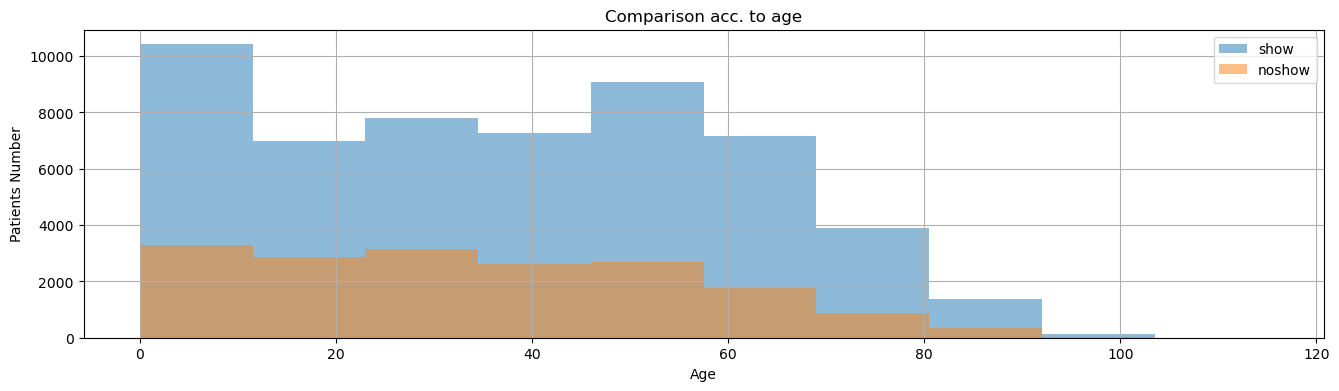

In [20]:
# does age affect the attendence
def attendance(df,col_name,attended,absent): # setting
    plt.figure(figsize=[16,4])
    df[col_name][show].hist(alpha=.5,bins=10,label='show')
    df[col_name][noshow].hist(alpha=.5,bins=10,label='noshow')
    plt.legend();
    plt.title('Comparison acc. to age')
    plt.xlabel('Age')
    plt.ylabel('Patients Number');
attendance(df,'Age',show,noshow)

Ages from 0 : 8 are the most showing (it means that parents are taking care of their kids). And from 8:70 they are iligable with attendence and 70 or more they have a very little attendence.

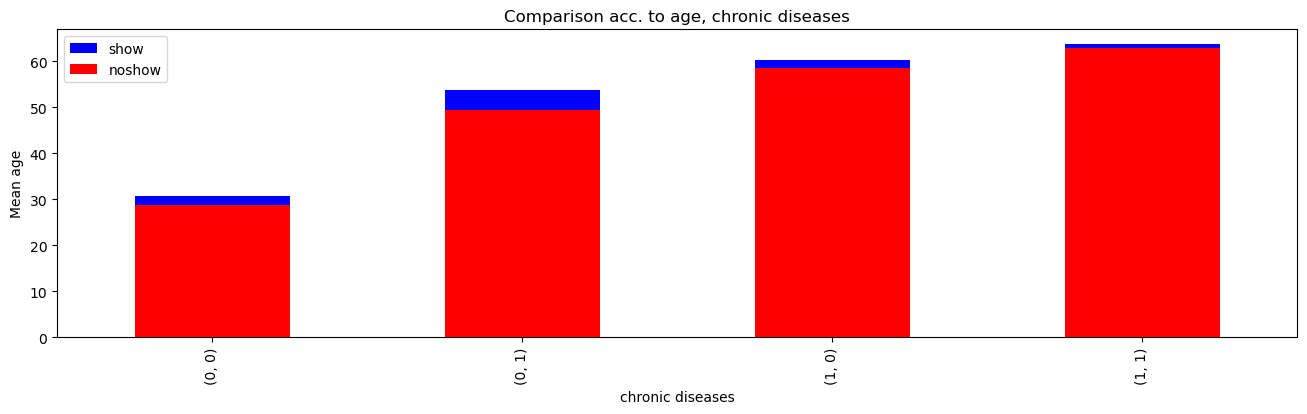

In [32]:
#does age and chronic diseases affect the attendence thgether
plt.figure(figsize=[16,4])
df[show].groupby(['Hypertension', 'Diabetes']).mean()['Age'].plot(kind='bar',color = 'blue',label='show')
df[noshow].groupby(['Hypertension', 'Diabetes']).mean()['Age'].plot(kind='bar',color = 'red',label='noshow')
plt.legend();
plt.title('Comparison acc. to age, chronic diseases')
plt.xlabel('chronic diseases')
plt.ylabel('Mean age');

In [22]:
df[show].groupby(['Hypertension', 'Diabetes']).mean()['Age'],df[noshow].groupby(['Hypertension', 'Diabetes']).mean()['Age']

(Hypertension  Diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64,
 Hypertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

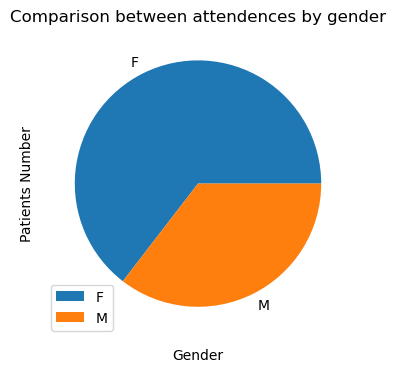

In [23]:
# what is the % fo genders of attendence in case of "show"?
def attendence(df,col_name,attended,absent):
    plt.figure(figsize=[12,4])
    df[col_name][show].value_counts(normalize=True).plot(kind='pie',label='show')
    plt.legend();
    plt.title('Comparison between attendences by gender')
    plt.xlabel('Gender')
    plt.ylabel('Patients Number');
attendence(df,'Gender',show,noshow)

We can see that Females have a major of attendence.

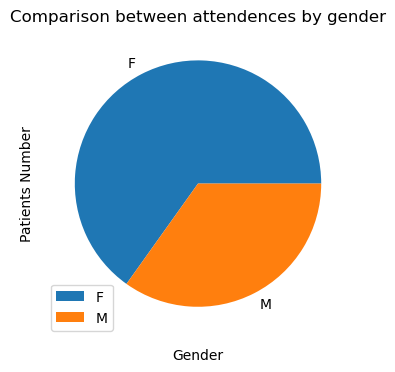

In [24]:
# what is the % fo genders of attendence in case of "noshow"?
def attendence(df,col_name,attended,absent):
    plt.figure(figsize=[12,4])
    df[col_name][noshow].value_counts(normalize=True).plot(kind='pie',label='noshow')
    plt.legend();
    plt.title('Comparison between attendences by gender')
    plt.xlabel('Gender')
    plt.ylabel('Patients Number');
attendence(df,'Gender',show,noshow)

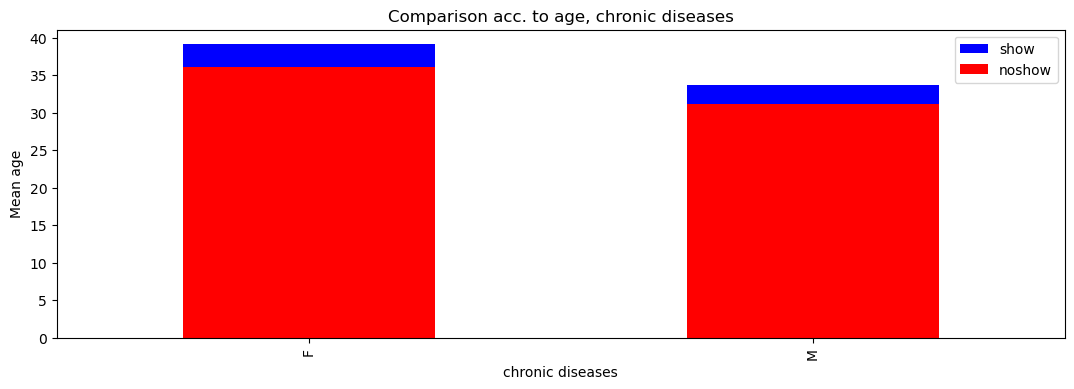

In [31]:
# Does age and chronic diseases affect the attendence thgether(check by gener mean age)?
plt.figure(figsize=[13,4])
df[show].groupby('Gender').mean()['Age'].plot(kind='bar',color = 'blue',label='show')
df[noshow].groupby('Gender').mean()['Age'].plot(kind='bar',color = 'red',label='noshow')
plt.legend();
plt.title('Comparison acc. to age, chronic diseases')
plt.xlabel('chronic diseases')
plt.ylabel('Mean age');

In [26]:
print(df[show].groupby('Gender').Age.mean(),df[noshow].groupby('Gender').Age.mean(),
df[show].groupby('Gender').Age.median(),df[noshow].groupby('Gender').Age.median())

Gender
F    39.130292
M    33.766269
Name: Age, dtype: float64 Gender
F    36.06501
M    31.22040
Name: Age, dtype: float64 Gender
F    39.0
M    32.0
Name: Age, dtype: float64 Gender
F    34.0
M    29.0
Name: Age, dtype: float64


There is no correlation between age and ender affecting the show rate(the mean and the median) of genders ages are almost the same.

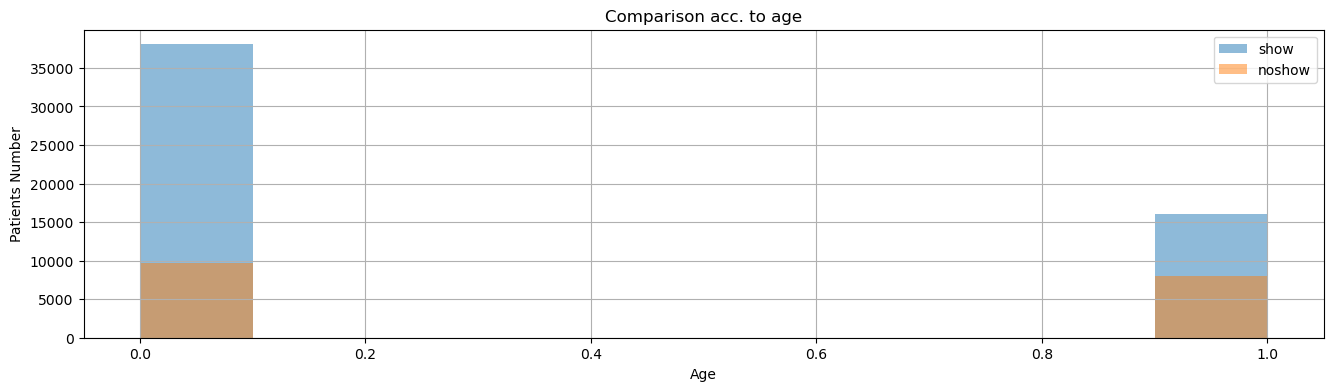

In [27]:
# Does receining SMS affect the attendence?
def attendance(df,col_name,attended,absent):
    plt.figure(figsize=[16,4])
    df[col_name][show].hist(alpha=.5,bins=10,label='show')
    df[col_name][noshow].hist(alpha=.5,bins=10,label='noshow')
    plt.legend();
    plt.title('Comparison acc. to age')
    plt.xlabel('Age')
    plt.ylabel('Patients Number');
attendance(df,'SMS_received',show,noshow)

Number of showing patients reecieiving SMS is greater than showing with receiving SMS, which means that we have to reconcern our SMS campaghin.

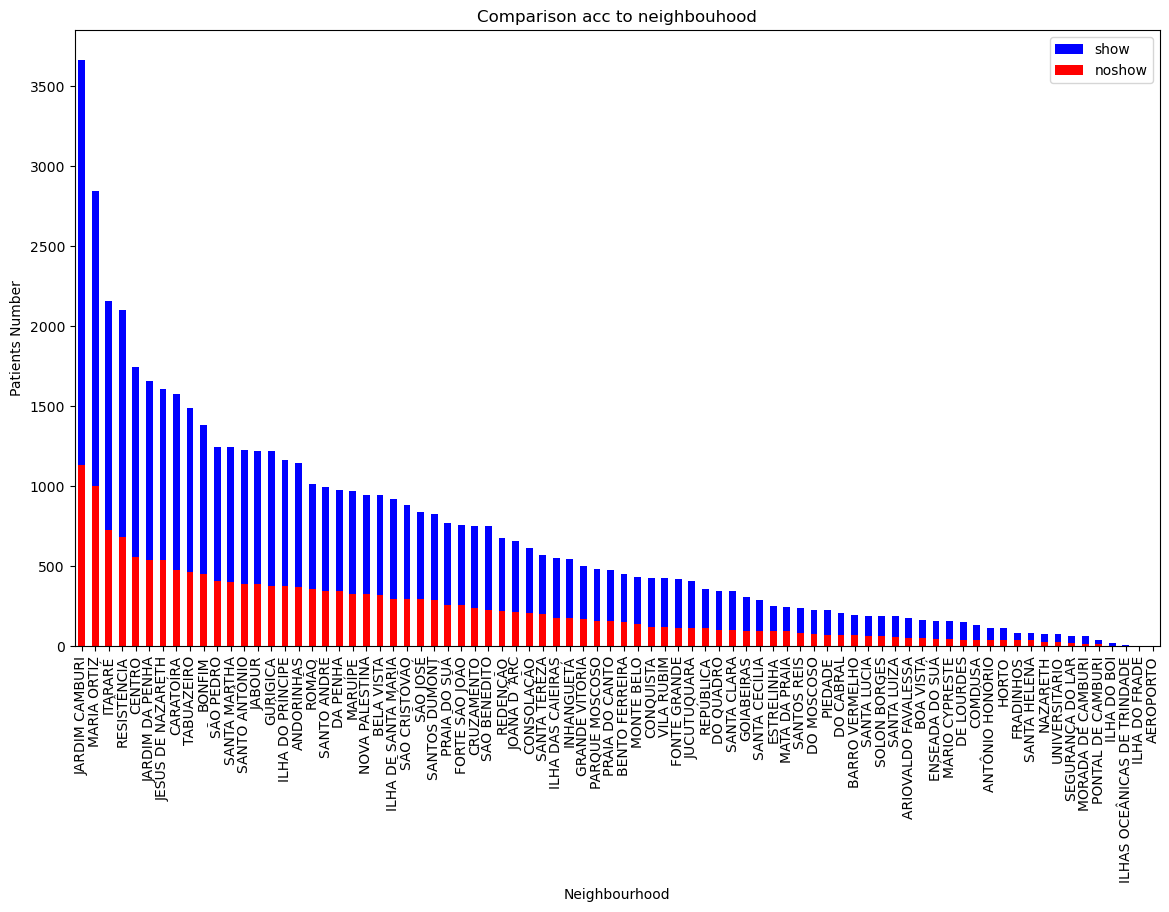

In [30]:
# Does neighbourhood affect the attendence
plt.figure(figsize=[14,8])
df.Neighbourhood[show].value_counts().plot(kind='bar',color = 'blue',label='show')
df.Neighbourhood[noshow].value_counts().plot(kind='bar',color = 'red',label='noshow')
plt.legend()
plt.title('Comparison acc to neighbouhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients Number');

Neighbourhood has as effective role on attendence.

<a id='conclusions'></a>
## Conclusions

Neighbourhood has a great effect on attendence.

Number of showing patients form specific neighbourhood affected by receiving SMS and their "Ages".

Age has a clear influence on the showing rate Ages from 0 : 8 are the most showing (it means that parents are taking care of their kids). And from 8:70 they are iligable with attendence and 70 or more they have a very little attendence.

Number of showing patients reecieiving SMS is greater than showing with receiving SMS, which means that we have to reconcern our SMS campaghin.

We can see that Females have a major of attendence with a percentage about 66%.

we can also notice that the Number of showed patients is (54154)is a 3 times greater than Non showed (17663).



In [1]:
from subprocess import call
# call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])